## Indian Start-up Funding Analysis


### Project Scenario
The Team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, I was tasked to:

- Investigate the ecosystem and propose the best course of action.
- Analyze funding received by start-ups in India from 2018 to 2021.
- Separate data for each year of funding will be provided.
- Find the start-ups’ details, the funding amounts received, and the investors' information.

### Business Understanding
The Indian startup ecosystem has experienced significant growth and investment over the past few years. As a data expert tasked with investigating this ecosystem, our goal is to analyze the funding received by startups in India from 2018 to 2021 and provide insights to guide investment decisions. By examining the details of startups, funding amounts, and investor information, we aim to understand the trends, opportunities, and challenges within the Indian startup landscape.

### Objective
To analyze funding trends and dynamics within the Indian start-up ecosystem from 2018 to 2021 and propose strategic recommendations for the team's venture.

### Hypothesis Testing
##### Null Hypothesis(Ho): There is no siginificate difference in the amount of funding between startups in Bangalore.
##### Alternative Hypothesis(Ha): There is a siginificate difference in the amount of funding between startups in Banaglore.

### Business Questions
####
1.What sectors have shown the highest growth in terms of funding received over the past four years?

2.What locations within India have emerged as the primary hubs for startup activity and investment?

3.Are there any notable differences in funding patterns between early-stage startups and more established companies?

4.Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India?

5.Which investors have more impact on startups over the years?

6.What are the key characteristics of startups that successfully secure funding, and how do they differ from those that struggle to attract investment?


In [1]:
from dotenv import dotenv_values 
import pyodbc 
import numpy as np
import pandas as pd                      
import re     
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statistics as stat 
from scipy.stats import mannwhitneyu
from scipy import stats            
from scipy.stats import ttest_ind  
from matplotlib.ticker import FuncFormatter  
import warnings
warnings.filterwarnings('ignore')

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


### First Data Set
The first data was from a database management system, that is MIRCORSOFT SQL SERVER. Connection was made to the database using an Open Database Connectivity standard library, pyodbc. <br>
Two tables were read from the databases. That is, <br>
Table 1: dbo.LP1_startup_funding2020 <br>
Table 2: dbo.LP1_startup_funding2021


In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [3]:
# Create a connection string
# connection_string = f"Driver={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.

connection = pyodbc.connect(connection_string)

In [5]:
# Sql query to get the 2020 data
query = "Select * from dbo.LP1_startup_funding2020"
table_1 = pd.read_sql(query, connection)


In [6]:
# Sql query to get the 2021 data
query = "Select * from dbo.LP1_startup_funding2021"
table_2 = pd.read_sql(query, connection)

In [7]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [8]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [9]:
table_1.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None


In [10]:
table_1[table_1['column10'].notna()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
611,Walrus,2019.0,Bangalore,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,NaN,Pre-Seed,Pre-Seed
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...",1700000.0,Seed Round,Seed Round


##### Drop column10 in table_1 since it has just two values that are not null and are also just repetition of values in Stage column 

In [11]:
# Drop column10
table_1.drop('column10', axis=1, inplace=True) if 'column10' in table_1.columns else None


In [12]:
# Function to clean the column names

def stripper(string: str, strip: list) -> str:
    """Strips a strip list from a given string and returns the string"""
    for s in strip:
        string = string.replace(s, '')
        
    return string
    
def replacer(string: str, replace: list) -> str:
    """Replaces each character in replace list with underscore given a string and returns the string"""
    for r in replace:
        string = string.replace(r, '_')
                
    return string
    
def clean_column_names(df):
    strip   = ['(', ')', '$']
    replace = [' ', '/'] 
    df.columns = [replacer(stripper(col_name.lower(), strip), replace) for col_name in df.columns]
    return df


In [13]:
# Clean the column names
table_1 = clean_column_names(table_1)
table_2 = clean_column_names(table_2)

In [14]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1055 non-null   object 
 1   founded        842 non-null    float64
 2   headquarter    961 non-null    object 
 3   sector         1042 non-null   object 
 4   what_it_does   1055 non-null   object 
 5   founders       1043 non-null   object 
 6   investor       1017 non-null   object 
 7   amount         801 non-null    float64
 8   stage          591 non-null    object 
dtypes: float64(2), object(7)
memory usage: 74.3+ KB


In [15]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1209 non-null   object 
 1   founded        1208 non-null   float64
 2   headquarter    1208 non-null   object 
 3   sector         1209 non-null   object 
 4   what_it_does   1209 non-null   object 
 5   founders       1205 non-null   object 
 6   investor       1147 non-null   object 
 7   amount         1206 non-null   object 
 8   stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


##### Create year column to identify each dataset

In [16]:
# Table 1: dbo.LP1_startup_funding2020
table_1['year'] = 2020

# Table 2: dbo.LP1_startup_funding2021
table_2['year'] = 2021

##### First Data Set



In [17]:
# First Data set
first_dataset = pd.concat([table_1, table_2], ignore_index=True)

first_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2264 non-null   object 
 1   founded        2050 non-null   float64
 2   headquarter    2169 non-null   object 
 3   sector         2251 non-null   object 
 4   what_it_does   2264 non-null   object 
 5   founders       2248 non-null   object 
 6   investor       2164 non-null   object 
 7   amount         2007 non-null   object 
 8   stage          1372 non-null   object 
 9   year           2264 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 177.0+ KB


In [18]:
first_dataset['amount'].unique()

array([200000.0, 100000.0, nan, 400000.0, 340000.0, 600000.0, 45000000.0,
       1000000.0, 2000000.0, 1200000.0, 660000000.0, 120000.0, 7500000.0,
       5000000.0, 500000.0, 3000000.0, 10000000.0, 145000000.0,
       100000000.0, 21000000.0, 4000000.0, 20000000.0, 560000.0, 275000.0,
       4500000.0, 15000000.0, 390000000.0, 7000000.0, 5100000.0,
       700000000.0, 2300000.0, 700000.0, 19000000.0, 9000000.0,
       40000000.0, 750000.0, 1500000.0, 7800000.0, 50000000.0, 80000000.0,
       30000000.0, 1700000.0, 2500000.0, 40000.0, 33000000.0, 35000000.0,
       300000.0, 25000000.0, 3500000.0, 200000000.0, 6000000.0, 1300000.0,
       4100000.0, 575000.0, 800000.0, 28000000.0, 18000000.0, 3200000.0,
       900000.0, 250000.0, 4700000.0, 75000000.0, 8000000.0, 121000000.0,
       55000000.0, 3300000.0, 11000000.0, 16000000.0, 5400000.0,
       150000000.0, 4200000.0, 22000000.0, 52000000.0, 1100000.0,
       118000000.0, 1600000.0, 18500000.0, 70000000000.0, 800000000.0,
       4000

##### Second Data Set

In [19]:
# Load dataset
second_dataset = pd.read_csv('My data/startup_funding2019.csv')

second_dataset = clean_column_names(second_dataset)

second_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  89 non-null     object 
 1   founded        60 non-null     float64
 2   headquarter    70 non-null     object 
 3   sector         84 non-null     object 
 4   what_it_does   89 non-null     object 
 5   founders       86 non-null     object 
 6   investor       89 non-null     object 
 7   amount         89 non-null     object 
 8   stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [20]:
second_dataset['amount'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

##### Third Data Set

In [21]:
# Load dataset
third_dataset = pd.read_csv('My data/startup_funding2018.csv')

third_dataset = clean_column_names(third_dataset)

third_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_name   526 non-null    object
 1   industry       526 non-null    object
 2   round_series   526 non-null    object
 3   amount         526 non-null    object
 4   location       526 non-null    object
 5   about_company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [22]:
third_dataset['amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

##### Rewriting the clomun names to become uniform

In [23]:
# Rename round_series to stage and location to headquarter
third_dataset.rename(columns={
    'company_name': 'company_brand', 
    'industry': 'sector', 
    'round_series': 'stage', 
    'about_company': 'what_it_does', 
    'location': 'headquarter'
    },
    inplace=True
)

third_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_brand  526 non-null    object
 1   sector         526 non-null    object
 2   stage          526 non-null    object
 3   amount         526 non-null    object
 4   headquarter    526 non-null    object
 5   what_it_does   526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


##### Create Year column to identify each dataset


In [24]:
# Create year column

# The second data is a flat-file name startup_funding2019.csv
second_dataset['year'] = 2019

# The third part of the data flat-file named startup_funding2018.csv
third_dataset['year']  = 2018

##### Create the final concatenated dataset

In [25]:
# Final Data set
final_dataset = pd.concat([first_dataset, second_dataset, third_dataset], ignore_index=True)

final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2622 non-null   object 
 8   stage          1941 non-null   object 
 9   year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


In [26]:
final_dataset.head(2)

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020


### Cleaning Columns

- Headquarter & Sector column
    - If column value contains '#REF!', clean it and shift the row starting from that column by 1 step and until the stage column
    - Sanitize sector column if after cleaning and shifting, but the sector value is also present among unique values of the headquarter column
    - Fixes index 1297, 1312, 2155

In [27]:
# Function to remove '#REF!' in a series
def remove_ref(value):
    if isinstance(value, str):
        value = value.replace('#REF!', '').strip()
            
    return value

# Columns of Interest 
columns = ['headquarter', 'investor']
for column in columns:    
    # Identify rows where column value contains '#REF!
    mask = final_dataset[column].str.contains('#REF!')
    
    # Fill missing values in mask with False
    mask.fillna(False, inplace=True)
    
    # Update the column by applying the remove_ref function to the column
    final_dataset.loc[mask, column] = final_dataset.loc[mask, column].apply(remove_ref)
    
    # Shift values in selected rows excluding the last column 'year'
    final_dataset.loc[mask, column:'stage'] = final_dataset.loc[mask, column:'stage'].shift(1, axis=1)


# Sanitisizing the sector column after shifting
mask = final_dataset['sector'].apply(lambda x: x in final_dataset['headquarter'].unique())

# Update 'headquarter' value with 'sector' value
final_dataset.loc[mask, 'headquarter'] = final_dataset.loc[mask, 'sector']

# Set the 'sector' value to NaN
final_dataset.loc[mask, 'sector'] = np.nan          

##### Replace 'None' string values with NaN element-wise allowing for consistent representation of missing values

In [28]:
# Function replace None with NaN
def replace_none(value):
    if isinstance(value, str) and (value.lower() == 'none' or value.lower() == 'nan'):
        value = np.nan
    
    return value

# Apply the function to all columns
final_dataset = final_dataset.applymap(replace_none) # element-wise

In [29]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2751 non-null   object 
 3   sector         2781 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2252 non-null   object 
 7   amount         2623 non-null   object 
 8   stage          1945 non-null   object 
 9   year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


##### If a value in stage column is a website link, its correct value is NaN

**Website link in stage column is https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593**

In [30]:
# Function to remove website link from stage column
def remove_website_link(value):
    # Regular expression pattern to match website URLs that begin with http:// or https:// with an optional www
    pattern = r'https?://(?:www\.)?\w+\.\w+(?:/\S*)?'
    
    # Check if the value is a string and matches the pattern
    if isinstance(value, str) and re.match(pattern, value):
        return np.nan
    else:
        return value

In [31]:
# Remove website link values from the stage column
final_dataset['stage'] = final_dataset['stage'].apply(remove_website_link)

#### Function to clean the amount column
#### Exchange rates 
[Source: OFX](https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/)
```bash
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

In [32]:
# Function to clean amount values
def floater(string):
    try:
        string = float(string)
    except ValueError:
        string = np.nan
    
    return string
    
def clean_amount(row): 
    amount = row[0]    
    year   = row['year'] 
    
    # Source: https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/
    exchange_rates = {
        2018: 0.014649,
        2019: 0.014209,
        2020: 0.013501,
        2021: 0.013527
    }
    
    exchange_rate = exchange_rates[year]   
    
    # Convert to string
    amount = str(amount)   
    
    if isinstance(amount, str):        
        # Set of elements to replace
        to_replace = {' ', ','}

        # Replace each element in the set with an empty string
        for r in to_replace:
            amount = amount.replace(r, '')        
                        
        if amount == '' or amount == '—': 
            amount = np.nan
        # If the amount is in INR (Indian Rupees), convert it to USD using the conversion rate of the year
        elif '₹' in amount:
            amount = amount.replace('₹', '')
            amount = floater(amount) * exchange_rate
        
        # If the amount is in USD, remove the '$' symbol and convert it to a float
        elif '$' in amount:
            amount = amount.replace('$', '')
            amount = floater(amount)
        else:
            amount = floater(amount)

    
    return amount


##### If the investor value is a number or contains $, the correct value for amount if missing is the investor value, the correct value for stage is the old amount value and the investor value becomes NaN or missing

In [33]:
# Identify rows where 'investor' value is numeric using clean amount function
mask = final_dataset[['investor', 'year']].apply(lambda row: pd.notna(clean_amount(row)), axis=1)

# Update 'stage' column with the 'amount' value if stage is NaN
stage_mask = final_dataset['stage'].isna()
final_dataset.loc[mask & stage_mask, 'stage']    = final_dataset.loc[mask, 'amount']

# Update 'amount' column with 'investor' value
final_dataset.loc[mask, 'amount']                = final_dataset.loc[mask, 'investor']

# Set 'investor' to NaN
final_dataset.loc[mask, 'investor']              = np.nan
         


##### If the 'stage' value is a number or contains $, the column 'what_it does' becomes its old value concatenated with the value in the 'founder' column. The correct value for 'founder' is the 'investor' value and the correct value for 'investor' is the 'amount' value and correct 'amount' becomes the old 'stage' value while the correct value for 'stage' is NaN or missing. 


In [34]:
# Identify rows where 'stage' value is numeric using clean amount function
mask = final_dataset[['stage', 'year']].apply(lambda row: pd.notna(clean_amount(row)), axis=1)

# Update the 'what_it_does' column to its concatenation with 'founder' value
old_what_it_does = final_dataset.loc[mask, 'what_it_does']
old_founder      = final_dataset.loc[mask, 'founders']

final_dataset.loc[mask, 'what_it_does']    = old_what_it_does.fillna('') + ' ' + old_founder.fillna('')

# Update 'founder' column using the old 'investor' value
final_dataset.loc[mask, 'founders']        = final_dataset.loc[mask, 'investor']

# Update 'investor' column using the old 'amount' value
final_dataset.loc[mask, 'investor']        = final_dataset.loc[mask, 'amount']

# Update 'amount' column using the old 'stage' value
final_dataset.loc[mask, 'amount']          = final_dataset.loc[mask, 'stage']

# Set 'stage' to NaN
final_dataset.loc[mask, 'stage']           = np.nan

##### Clean and convert amounts to USD and rename colume from amount to amount($)

In [35]:
# Clean and convert amounts to USD considering the average exchange rate per year
final_dataset['amount'] = final_dataset[['amount','year']].apply(lambda row: clean_amount(row), axis=1)


In [36]:
# Renaming the amount column
final_dataset.rename(columns={'amount': 'amount($)'}, inplace=True)

##### Function to Clean the Headquarter Column

In [37]:
# Fix headquarter values, take every word before the first comma as headqurter
def splitter(value):
    """
    Splits a string by comma and returns the first part.

    Args:
        value (str or None): The value to be split.

    Returns:
        str or None: The first part of the string before the first comma, or the original value if the input is not a string.
    """
    return value.split(',')[0] if isinstance(value, str) else value

final_dataset['headquarter'] = [splitter(hq) for hq in final_dataset['headquarter']]

In [38]:
# Renaming some values in the headquarter column
# Define the mapping for name changes
name_changes = {
    'Bangalore': 'Bangalore',
    'Bangalore city': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'Dheli': 'New Delhi',
    'New dheli': 'New Delhi'
}

# Replace the names in the 'headquarter' column
final_dataset['headquarter'] = final_dataset['headquarter'].replace(name_changes)

In [39]:
final_dataset['sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

##### Function to Clean the Sector Column

In [40]:
def heal_column_from_chars(df: pd.DataFrame, column: str = 'sector', chars: list = [',', ' ', '&', 'and', '/']) -> pd.DataFrame:
    """
    Returns a dataframe with the sector column having the least redundant value for sector.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to clean.
        column (str): The name of the column to clean. Defaults to 'sector'.
        chars (list): A list of characters or substrings to handle. Defaults to [',', ' ', '&', 'and', '/']. Always start with ',' for sector 
        
    Returns:
        pd.DataFrame: The DataFrame with the specified column cleaned.
    """
    
    def count_char(value, char):
        """
        Finds all occurrences of char in value and returns the count.
        
        Parameters:
            value (str): The string in which to search for occurrences of char.
            char (str): The character to count occurrences of.
        
        Returns:
            int: The count of occurrences of char in value.
        """
        # Use re.findall to find all occurrences of char in value and return the count
        return len(re.findall(re.escape(char), str(value)))
    
    def char_to_nochar_value(char_value, char, no_char_column):
        """
        Find the equivalent value of char_value in no_char_column.
        
        Parameters:
            char_value (str): The string to process.
            char (str): The character to split the char_value string.
            no_char_column (pd.Series): The column containing unique values to search for the equivalent value.
        
        Returns:
            str: The equivalent value found in no_char_column.
        """
        
        # Default no char value        
        no_char_value = char_value 
        
        # Split by char, if char='and', "Food and Beverage" = ["Food ", " Beverage"]
        char_value    = char_value.split(char) 
        
        # If char is comma ',' or if char_value is not amongst no_char_column
        no_char_value = char_value[0] if char == ',' else no_char_value
        
        other_value = ''
            
        def find_index(where, value):
            """
            Find the index where the given value matches the elements in the Series 'where'.
            
            Parameters:
                where (pd.Series): The Series containing strings to search for the value.
                value (str): The value to search for.
            
            Returns:
                np.ndarray: The array of indices where the value matches in the Series.
            """
            return np.where(where.str.lower().unique() == value.strip().lower())[0]
            
        for value in char_value: 
            other_value = other_value + ' ' + value
            # Find the index of value in unique no_char_column
            indexof_value = find_index(where=no_char_column, value=value)
            
            # Find the index of other value in unique no_char_column
            indexof_othervalue = find_index(where=no_char_column, value=value)
            
            if indexof_value.size == 1:
                # If a unique match is found, update no_char_value
                no_char_value = no_char_column.unique()[indexof_value[0]]              
                break
            elif indexof_othervalue.size == 1:  
                # If a unique match is found, update no_char_value
                no_char_value = no_char_column.unique()[indexof_othervalue[0]]              
                break
            else:
                pass
                
        return no_char_value
        
    for char in chars: 
                
        char_list = [count_char(value, char) for value in df[column]]
                
        char_threshold =  0

        mask_char      = [x > char_threshold for x in char_list]    # Mask Boolean

        mask_no_char   = [not x for x in mask_char]
        
        char_column    = df.loc[mask_char, column]

        no_char_column = df.loc[mask_no_char, column]                

        # Convert 'char' column to no 'char' column in the dataframe if there is a no 'char' equivalent    
        df.loc[mask_char, column] = char_column.apply(lambda x: char_to_nochar_value(x, char, no_char_column))
    
    return df  


In [41]:
# Cleaning the sector column
final_dataset = heal_column_from_chars(final_dataset)

In [42]:
# Standardize the sector names by converting them to title case
final_dataset["sector"] = final_dataset["sector"].str.title()

##### Categorization of the sector column

In [43]:
category_dict = {
    'Finance': set(['Credit Cards', 'Banking','Insuretech','Infratech','Saas\xa0\xa0Startup', 'Equity Management','Wealth Management','Saas  Startup','Insurtech','Crowdsourcing','Cryptocurrency','Online Financial Service', 'Neo-Banking', 'Capital Markets', 'Mutual Funds','Bank', 'Finance', 'Crypto', 'Account', 'Credit', 'Venture', 'Crowd', 'Blockchain', 'Fund', 'Lending', 'Trading', 'Wealth', 'Insurance', 'Remittance', 'Money', 'Equity', 'Investment', 'Mortgage', 'Financial Services', 'Nft', 'Payments']),
    'Agriculture': set(['Agritech','Agriculture', 'Soil-Tech','Fishery','Agri', 'Biotechnology', 'Industrial', 'Farming', 'Fish', 'Milk', 'Diary', 'Dairy', 'Dairy Startup']),
    'Technology': set(['Machine Learning','Hrtech','Ar/Vr','Technology','Ai', 'E-Connect','E-Market', 'Traveltech','Biotech','Medtech','Ad-Tech','Healthtech', 'Games', 'Computer & Network Security', 'Saas Startup', 'Scanning App', 'Cloud Company', 'Cybersecurity', 'Aero Company', 'Cloud Computing', 'Techonology', 'E-Learning', 'Content Management', 'Recruitment', 'Consultancy', 'Ecommerce', 'Ev', 'Designing', 'Networking', 'Product Studio', 'Ecommerce', 'Proptech', 'Techonology', 'Milk Startup', 'Craft Beer', 'Craft Beer', 'Online Credit Management Startup', 'Foodtech', 'Spacetech', 'Deisgning', 'Clothing', 'Logitech', 'Femtech', 'D2C', 'Skill Development', 'Martech', 'Luxury Car Startup', 'Emobility', 'It', 'Healthcare', 'Qsr Startup', 'Sportstech', 'E-Marketplace', 'Cleantech', 'Heathtech', 'Digital Mortgage', 'Innovation Management', 'Photonics Startup', 'Life Sciences', 'Cloud Kitchen', 'Content Marktplace', 'Vehicle Repair Startup', 'Photonics Startup', 'Nano Distribution Network','Artificial Intelligence', 'Fintech', 'Tech', 'Cloud', 'Artificial', 'Data', 'Internet', 'Things', 'Apps', 'Android', 'Software', 'Computer', 'Mobile', '3d Printing', 'Funding Platform', 'Applications', 'File', 'Embedded Systems', 'Portals', 'Fraud Detection', 'Search Engine', 'Nanotechnology', 'Security', 'Saas', 'Bit Company', 'Augmented Reality', 'Drone', 'Ar Startup', ']baas', 'App', '/', 'Virtual', 'It Startup', 'Photonics', 'E Tailor', 'Bai', 'Ai & Debt', 'Ai Company', 'Ai Chatbot', 'Iot Startup', 'Ai Startup', 'Iot', 'Social Platform', 'Ar Platform', 'Api Platform', 'Mlops Platform', 'Online Storytelling', 'Digital Platform', 'Paas Startup', 'Taas Startup', 'Digital Assistant']),
    'Food & Beverage': set(['Food & Beverage', 'Beverages', 'Foodtech', 'Craft Beer', 'Milk Startup','Beverage', 'Catering', 'Cook', 'Food', 'Restaurants']),
    'Transport': set(['Auto-Tech', 'Tyre Management', 'Automobiles','Automobile', 'E-Mobility', 'Autonomous Vehicles', 'Vehicle Repair Startup','Automotive', 'Air Transport', 'Transport', 'Logistics', 'Vehicle', 'Transportation', 'Aviation', 'Vehicles', 'Tyre', 'Fleet', 'Wheels', 'Aero', 'Mobility', 'Aeorspace', 'Wl & Rac Protection', 'Micro-Mobiity', 'Delivery Service']),
    'Business Intelligence': set(['Business Intelligence','Data Science','Analytics', 'Consulting', 'Human', 'Career', 'Erp', 'Advertising', 'Advertisement', 'Market Research', 'Entrepre', 'Recruit', 'Hr', 'Working', 'Sultancy', 'Advisory', 'Work', 'Job', 'Management', 'Skill', 'Legal', 'Crm', 'Specific Domain To Individuals', 'Information Services']),
    'Energy': set(['Renewables & Environment', 'Renewable Player','Electric Vehicle', 'Pollution Control Equiptment', 'Cleantech','Clean Energy', 'Energy', 'Boil &', 'Boil', 'Solar', 'Electricity', 'Environment']),
    'Hospitality': set(['Hospitality','Customer Service','Home Services', 'E Store','Customer Service Company', 'Co-Working', 'Accomodation', 'Cloud Kitchen','Customer', 'Hospital', 'Tourism', 'Events', 'Wedding', 'Travel', 'Hosts', 'Booking', 'Wedding', 'Qsr']),
    'Commerce': set(['Trading Platform','Consumer','Supply Chain Platform','B2B','Business Supplies & Equipment','Fmcg','E-Tail','Entreprenurship','Car Trade', 'Reatil Startup','E-Mobility','Estore', 'Capital Markets','E-Commerce', 'Sales & Services','Sales And Distribution', 'Estore', 'Retail Startup', 'Packaging Services', 'E-Marketplace','2', 'Trade', 'Enterprise', 'Commerce', 'Business', 'Commercial', 'Consumer Goods', 'Marketplace', 'Business Consumer', 'Marketing', 'Retail', 'Market', 'Store', 'Furniture', 'Wholesale', 'Wine & Spirits', 'Multinational', 'E-', 'Packaging', 'Sales', 'Tplace', 'Warehouse', 'Fm', 'Product', 'Merchandise', 'Reatil', 'Conglomerates', 'Invoice Discounting', 'Supply Chain', 'Car Service', 'Service Industry', 'Company-As-A-Service', 'Consumer Service', 'Facilities Support Services', 'Facilities Services']),
    'Manufacturing': set(['Mechanical & Industrial Engineering', 'Packaging Solution Startup', 'Manufacturing', 'Home Interior Services', 'Craft Beer', 'Product Studio', 'Luxury Car Startup', 'Mechanical Or Industrial Engineering','Battery', 'Manufacturing', 'Electronics', 'Industrial Automation', 'Aerospace', 'Conductor', 'Gaming', 'Robotics', 'Engineering', 'Mechanical', 'Appliance', 'Automation', 'Ev Startup', 'Startup Laboratory', 'E-Vehicle', 'Luxury Car']),
    'Media and Entertainment': set(['Media and Entertainment', 'Games', 'E-Sports', 'Celebrity Engagement', 'Content Creation', 'Virtual Auditing Startup', 'Content Marktplace','Media', 'Dating', 'Music', 'Audio', 'Gaming', 'Creative', 'Entertainment', 'Broadcasting', 'Video', 'Blogging', 'Content', 'Celebrity', 'Ott']),
    'Real Estate': set(['Commercial Real Estate',  'Interior & Decor', 'Co-Living','Apartment', 'Real Estate', 'Home', 'Interior', 'Construction', 'Rental', 'Housing', 'Accommodation', 'Hauz']),
    'Telecommunications': set(['Telecommunications','Telecommuncation','Telecommunication','Telecom', 'News', 'Escrow', 'Publication']),
    'Health': set(['Healthtech', 'Healthcare','Pharmaceuticals','Pharmaceuticals', 'Healtcare','Pharmaceutical','Pharmacy', 'Helathcare', 'Medical', 'Healthtech','Dental', 'Health', 'Health Insurance', 'Medic', 'Supplement', 'Biopharma', 'Veterinary', 'Pharma', 'Heathcare', 'Nutrition', 'Hygiene', 'Care', 'Sanitation', 'Bio', 'Cannabis', 'Tobacco', 'Sciences']),
    'Sports & Fitness': set(['Sports & Fitness', 'Sportstech','Sports', 'Esports', 'Game', 'Ball', 'Player', 'Manchester']),
    'Beauty and Fashion': set(['Skincare Startup', 'Foootwear','Eye Wear', 'Personal Care Startup', 'Beauty and Fashion', 'Clothing','Beauty', 'Cosmetic', 'Skincare', 'Fashion', 'Wear', 'Cosmetics', 'Textiles', 'Eyewear', 'Jewellery', 'Cloth', 'Eyeglasses']),
    'Government': set(['Defense & Space', 'Government', 'Advisory Firm','Communities', 'Smart Cities', 'Government', 'Classifieds', 'Community', 'Water', 'Defense', 'Pollution', 'Translation & Localization', 'Taxation', 'Maritime']),
    'Education': set(['E-Learning', 'EduTech','Edttech', 'E-Learning', 'Skill Development', 'E-Learning', 'Job Discovery Platform', 'E-Learning', 'Preschool Daycare', 'E-Learning', 'E-Learning','Edutech', 'Education', 'Learn', 'Edtech']),
    'NaN': set(['Nan','-', 'nan','NaN','—', None]),
    'LifeStyle': set(['LifeStyle', 'Lifestyle','Decor', 'Fitness','Home Decor','Arts & Crafts', 'Training', 'Wellness', 'Personal Care', 'Deisgn', 'Craft', 'Design', 'Podcast', 'Lifestyle', 'Spiritual', 'Matrimony', 'Living', 'Cultural', 'Home']),
    'Others': set([ 'Water Purification','Job Portal','Social Audio','Others','Cannabis Startup','Staffing & Recruiting','Human Resources','Venture Capital','Multinational Conglomerate Company','Venture Capitalist','Hauz Khas','Social Network','Coworking', 'Biomaterial Startup',  'Environmental Service',  'Content Publishing', 'Legaltech', 'Environmental Services', 'Data Intelligence', 'Work Fulfillment', 'Pet Care',  'Deeptech',  'Martech',  'Photonics Startup', 'Sanitation Solutions',   'Mutual Funds'])
}

def new_cat(sector):
    if isinstance(sector, str):
        for category, words in category_dict.items():
            if sector in words:
                return category
    return sector  

# Apply function to the sector column
final_dataset['sector'] = final_dataset['sector'].apply(new_cat)




In [44]:
# Converting Nan values from string to pandas null values
# Assuming df is your DataFrame and 'sector' is the column containing 'NaN' strings
final_dataset['sector'] = final_dataset['sector'].replace(['NaN', 'Nan', '-', 'nan', '—', None], pd.NA)


In [45]:
final_dataset['sector'].unique()

array(['Agriculture', 'Education', 'Health', 'Telecommunications',
       'Others', 'Technology', 'Finance', 'Commerce',
       'Media and Entertainment', 'Manufacturing', 'Transport',
       'Sports & Fitness', 'Energy', 'Business Intelligence',
       'Food & Beverage', 'LifeStyle', 'Real Estate', 'Hospitality',
       'Beauty and Fashion', 'Government', <NA>], dtype=object)

##### Function to Clean the Investor Column

In [46]:
# Split the 'investor' column by commas and expand into separate columns
investor_split = final_dataset['investor'].str.split(',', expand=True)
# Iterate over each column of the split DataFrame
for col in investor_split.columns:
    # Only replace non-null values in the original DataFrame
    mask = ~investor_split[col].isnull()
    final_dataset.loc[mask, 'investor'] = investor_split.loc[mask, col]
# Display the updated DataFrame
final_dataset['investor']

0         Angel investors
1         GSF Accelerator
2          Venture Center
3        PointOne Capital
4               Info Edge
              ...        
2874                  NaN
2875                  NaN
2876                  NaN
2877                  NaN
2878                  NaN
Name: investor, Length: 2879, dtype: object

##### Replace falsely unique values or actual duplicates in categorical and string columns with their first occurence in the final_dataset

In [47]:
# Heuristic Function to replace actual duplicates with first occurrence
def replace_col_duplicates(column):
    """
        Replaces duplicates values (identified through some heuristics) in a column with their first occurrence 
        Although the first occurrence might not be the best representation but it allows for consistency in values
        
        Parameter: column
        Returns  : column with consistent representation of values
    
    """
    actual_strings = {}  # Dictionary to store the first occurrence of each modified string
    
    def replace_string(string):
        actual_string = re.sub(r'[^\w]', '', string).lower() if isinstance(string, str) else string   # Replace all special characters including whitespaces with '' 
        if actual_string in actual_strings:
            return actual_strings[actual_string]
        else:
            actual_strings[actual_string] = string
            return string
    return column.apply(replace_string)


In [48]:
columns_of_interest = ['company_brand', 'headquarter', 'sector', 'investor', 'stage']

In [49]:
# Function to count the unique values
def count_unique_values(columns):
    for col in columns:
        # Print count of unique items in columns of interest
        print(f'{col}: {len(final_dataset[col].unique())}\n')

In [50]:
# Apply the replace actual duplicates function to the string or categorical columns
for col in columns_of_interest:
    final_dataset[col] = replace_col_duplicates(final_dataset[col])


In [51]:
# Count of unique values after running replace_col_duplicates function
count_unique_values(columns_of_interest)

company_brand: 2133

headquarter: 129

sector: 21

investor: 1266

stage: 57



##### Drop duplicated rows in final data set

In [52]:
# Drop duplicated from final dataset
final_dataset.drop_duplicates(inplace=True)

##### Change each column (founded and year) to appropriate Data types

In [53]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   float64
 2   headquarter    2729 non-null   object 
 3   sector         2732 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2228 non-null   object 
 7   amount($)      2302 non-null   float64
 8   stage          1925 non-null   object 
 9   year           2856 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 245.4+ KB


In [54]:
# Founded is year and datatype should be integer 32 handling missing values gracefuly
final_dataset['founded'] = final_dataset['founded'].astype('Int32') # Int32 instead of int32

In [55]:
# Year does not need to be int64 but int32
final_dataset['year'] = final_dataset['year'].astype('int32')

In [56]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   Int32  
 2   headquarter    2729 non-null   object 
 3   sector         2732 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2228 non-null   object 
 7   amount($)      2302 non-null   float64
 8   stage          1925 non-null   object 
 9   year           2856 non-null   int32  
dtypes: Int32(1), float64(1), int32(1), object(7)
memory usage: 225.9+ KB


##### Descriptive Statistics

In [57]:
final_dataset.describe(include='all')

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount($),stage,year
count,2856,2088.0,2729,2732,2856,2312,2228,2.302000e+03,1925,2856.000000
unique,2133,<NA>,127,20,2691,1979,1264,NaN,55,NaN
top,Byju's,<NA>,Bangalore,Technology,BYJU'S is an educational technology company th...,"Ashneer Grover, Shashvat Nakrani",Venture Catalysts,NaN,Seed,NaN
freq,11,<NA>,890,945,5,7,38,NaN,602,NaN
mean,NaN,2016.06705,NaN,NaN,NaN,NaN,NaN,1.214759e+08,NaN,2020.017857
std,NaN,4.368211,NaN,NaN,NaN,NaN,NaN,3.450413e+09,NaN,1.087759
min,NaN,1963.0,NaN,NaN,NaN,NaN,NaN,8.789400e+02,NaN,2018.000000
25%,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2020.000000
50%,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,2020.000000
75%,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,1.200000e+07,NaN,2021.000000


#### Observations
Company Distribution:
- There are a total of 2,856 companies in the dataset, with 2,133 unique company names.
- The most frequent company in the dataset is "Byju's," which appears 11 times.

Founding Years:
- The dataset includes founding years for 2,088 companies, with a range from 1963 to 2021.
- The mean founding year is around 2016, indicating that many companies in the dataset were founded in recent years.

Headquarters:
- The most common headquarters location is Bangalore, which is listed for 834 companies.

Sector Distribution:
- There are 21 unique sectors in the dataset, with "Technology" being the most common sector, listed for 945 companies.
- The sector distribution suggests a diverse range of industries represented in the dataset.

Investment Details:
- The dataset includes information about investors for 2,228 companies, with "Inflection Point Ventures" being the most frequent investor, appearing 35 times.
- The investment amount ranges from $878.94 to $150 billion, with a mean investment of approximately $121.48 million.

Company Stages:
- The dataset includes information about the stage of companies, with "Seed" being the most common stage, listed for 602 companies.
- The distribution of stages provides insights into the maturity levels of the companies in the dataset.

Year Distribution:
- The dataset covers data from at least 2018 to 2021, with most observations falling in the year 2020 and 2021.

### Handling Missing Values

In [58]:
final_dataset.isna().sum()

company_brand      0
founded          768
headquarter      127
sector           124
what_it_does       0
founders         544
investor         628
amount($)        554
stage            931
year               0
dtype: int64

##### Handling Missing Values in the Founders Column
##### The dataset had 545 missing values for the founders, so we decided to drop the column for founders as we will not need it for analysis

In [59]:
final_dataset.drop('founders', axis=1, inplace=True) 

##### Handling missing values in the stage column 
##### Replace Undisclosed values in 'stage' column with 'Venture - Series Unknown

In [60]:
# Fill missing values in 'stage' column with 'Venture - Series Unknown
final_dataset['stage'].fillna('Venture - Series Unknown', inplace=True)

# Replace Undisclosed values in 'stage' column with 'Venture - Series Unknown
final_dataset['stage'].replace(to_replace='Undisclosed', value='Venture - Series Unknown', inplace=True)


##### Handling Missing Values in the Sector column

In [61]:
def fill_missing_sector(value, category_dict):
    """
    Fill missing sector values based on the content of 'what_it_does' column using a category dictionary.

    Parameters:
    value (str): The content of the 'what_it_does' column.
    category_dict (dict): A dictionary mapping sector names to lists of keywords.

    Returns:
    str: The assigned sector based on the content of 'what_it_does'.
    """
    stopwords = ['it', "a", "an", "the", "and", "but", "or"]  # Add other stopwords to exclude
    sector = 'Others'  # Default sector if no match is found

    values = [v for v in value.split(' ') if v.lower() not in stopwords]

    for v in values:
        for sector_name, keywords in category_dict.items():
            if v.lower() in keywords:
                sector = sector_name
                break

    return sector

mask = final_dataset['sector'].isna()

# Assuming my_category_dict is defined elsewhere as your category dictionary variable
final_dataset.loc[mask, 'sector'] = final_dataset.loc[mask, 'what_it_does'].apply(fill_missing_sector, category_dict=category_dict)


##### Handling Missing values in the Investor Column
 

In [62]:
# Calculate the mode for each sector in the 'investor' column
mode_per_sector = final_dataset.groupby('sector')['investor'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")


# Fill missing values in the 'investor' column with the calculated mode per sector
final_dataset['investor'].fillna(mode_per_sector, inplace=True)


##### Handling Missing values in the column for Head Quarter

In [63]:
# Set seed for reproducibility
np.random.seed(2024)

# Identify the rows with missing 'headquarter' values
mask = final_dataset['headquarter'].isna()

# Get non-missing values for final_dataset['headquarter']
non_missing_hq = final_dataset.loc[mask==False, 'headquarter'] 

hq_missing     = mask.sum()

# Randomly sample non-missing values to fill missing values of size hq_missing, 114
hq_random      = np.random.choice(non_missing_hq, size=hq_missing)

# Fill missing values with randomly sampled headquarter values
final_dataset.loc[mask, 'headquarter'] = hq_random


##### Handling Missing Values in Founded Column

In [64]:
# Calculate the median founded grouped by year values
founded_median_per_year = final_dataset.groupby('year')['founded'].median()

# Calculate the overall median of median_per_year
overall_median_per_year = founded_median_per_year.median()

# Fill NaN values in founded_median_per_year with the overall median of median_per_year
founded_median_per_year.fillna(overall_median_per_year, inplace=True)

# Fill missing values in the 'founded' column with the calculated median per year
final_dataset['founded'].fillna(final_dataset['year'].map(founded_median_per_year), inplace=True)

##### Handling Missing Values in the Amount column

In [65]:
# Getting the median amount 
amount_median = final_dataset['amount($)'].median()

# Filling the missing values with the median amount
final_dataset['amount($)'].fillna(amount_median, inplace=True)

In [66]:
final_dataset.isna().sum()

company_brand    0
founded          0
headquarter      0
sector           0
what_it_does     0
investor         0
amount($)        0
stage            0
year             0
dtype: int64

### Hypothesis Test
#### Null Hypothesis(Ho): There is no siginificate difference in the amount of funding between startups in Bangalore.
#### Alternative Hypothesis(Ha): There is a siginificate difference in the amount of funding between startups in Banaglore.

In [67]:
# Divide the datset into two
startups_in_bangalore = final_dataset[final_dataset['headquarter']=='Bangalore']
startups_not_in_bangalore = final_dataset[final_dataset['headquarter']!='Bangalore']

#### Using Mann Whitney U-Test for the hypothesis since our data for the amount column is not normally distributed

In [68]:
#Perform Mann-Whitney U test
t, p = mannwhitneyu(startups_in_bangalore['amount($)'],startups_not_in_bangalore['amount($)'], alternative='two-sided')

# Print the test statistic and p-value
print("Mann-Whitney U test statistic:", t)
print("P-value:", p)

Mann-Whitney U test statistic: 1003888.0
P-value: 5.640955114273794e-08


In [69]:
# Set Significance level
alpha = 0.05

#Compare p-value to the significance level
if p < alpha:
    print("We reject the null hypothesis. Which is there is no siginificate difference in the amount of funding between startups in Bangalore.")
else:
   print("We failed to reject the null hypothesis. There is a siginificate difference in the amount of funding between startups in Bangalore.")

We reject the null hypothesis. Which is there is no siginificate difference in the amount of funding between startups in Bangalore.


### Univariate Analysis

Numerical Variables

In [70]:
# Summary statistics for numerical columns
numerical_summary = final_dataset.describe()

# Create a figure with subplots for each numerical column
fig = make_subplots(rows=1, cols=len(numerical_summary.columns) - 1, subplot_titles=numerical_summary.columns[1:])

# Iterate over numerical columns and add histograms to subplots
for i, column in enumerate(numerical_summary.columns[1:], start=1):  # Start from the second column
    fig.add_trace(go.Histogram(x=final_dataset[column], nbinsx=20, name=column), row=1, col=i)

# Update the layout
fig.update_layout(title='Distribution of Numerical Columns',
                  xaxis_title='Value',
                  yaxis_title='Frequency',
                  height=400,  # Set the height of the figure
                  width=900)  # Set the width of the figure

# Show the plot
fig.show()







#### Observations
- Based on the analysis, it is evident that the majority of companies received funding below 50 billion, with two outliers, one of which received the highest funding at 150 billion. Additionally, funding peaked in 2020 and 2021 but experienced a drop in 2019.

Categorical Variables

In [71]:
# Create a count plot for Sector using Plotly Express
fig = px.histogram(final_dataset, x='sector', title='Count of Startups in Each Sector')

# Update layout
fig.update_layout(xaxis_title='Sector', yaxis_title='Count', barmode='group',height =400, width = 800)

# Show the plot
fig.show()


#### Observations
- The analysis reveals that the Technology sector received the highest funding, followed by Commerce, Education, and Finance sectors in descending order of funding amounts.

### Bivariate Analysis 

Numerical-Numerical Relationship

In [72]:
# Create a scatter plot using Plotly Express
fig = px.scatter(final_dataset, x='year', y='amount($)', title='Amount($) vs. Funding Year',
                 labels={'year': 'Funding Year', 'amount($)': 'Amount($)'})

# Customize the layout
fig.update_layout(xaxis_title='Funding Year', yaxis_title='Amount($)', xaxis_tickangle=-45, height =400, width = 800)

# Show the plot
fig.show()



#### Observations
- The analysis indicates that the majority of funding is concentrated in the years 2020 and 2021.

Categorical-Numerical Relationship

In [73]:
# Create the box plot using Plotly Express
fig = px.box(final_dataset, x='sector', y='amount($)', title='Amount($) Distribution Across Sectors',
             labels={'sector': 'Sector', 'amount($)': 'Amount($)'})
fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  height=400,
                  width=800)
fig.show()



#### Observations
- Based on the analysis, funding across different sectors is generally in the same range on average.

### Answering Business Questions with Visualizations (EDA)

#### 1. What sectors have shown the highest growth in terms of funding received over the past four years?

In [74]:
# Calculate total funding received by each sector per year
total_funding_per_year = final_dataset.groupby(['year', 'sector'])['amount($)'].sum().reset_index()

# Get top 5 sectors by total funding received
top_5_sectors = total_funding_per_year.groupby('sector')['amount($)'].sum().nlargest(5).index

# Filter the data for only the top 5 sectors
funding_per_year_top5 = total_funding_per_year[total_funding_per_year['sector'].isin(top_5_sectors)]

# Pivot the table to have sectors as rows and years as columns
pivot_table = funding_per_year_top5.pivot(index='year', columns='sector', values='amount($)')

# Divide the amount by 1 billion to convert to billions
pivot_table_in_billions = pivot_table / 1e9

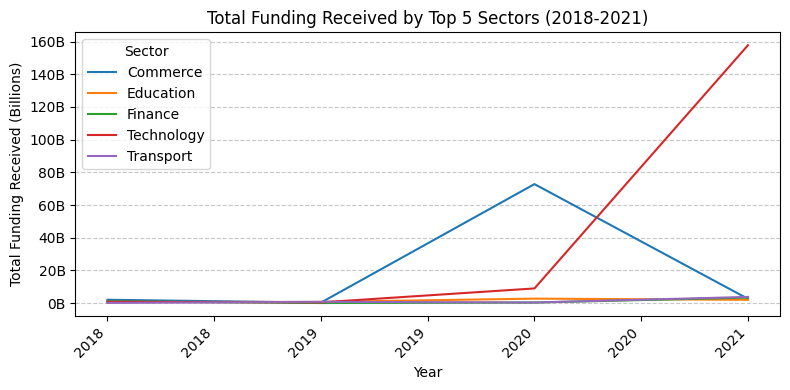

In [75]:
# Plot the total funding received for each sector over the years (line plot) in billions
ax = pivot_table_in_billions.plot(kind='line', figsize=(8, 4))

# Set a custom formatter to display "B" for billions on the y-axis
def billions_formatter(x, pos):
    return f'{x:.0f}B'

ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Set a custom formatter for the x-axis to display years without decimal places
def year_formatter(x, pos):
    return f'{int(x):d}'  # Format the year as an integer without decimal places

ax.xaxis.set_major_formatter(FuncFormatter(year_formatter))

plt.title('Total Funding Received by Top 5 Sectors (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Received (Billions)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observations
Initially, from 2018 to the beginning of 2019, the top five sectors displayed relatively similar average funding amounts. However, a notable shift occurred afterward. Commerce surged to its peak in early 2020 but experienced a subsequent decline towards 2021. On the other hand, Technology exhibited consistent growth throughout the period and showcased the highest increase, indicating robust and sustained growth. This analysis suggests that Technology emerged as the sector with the most significant growth trajectory during this time frame.

#### 2. What locations within India have emerged as the primary hubs for startup activity and investment?

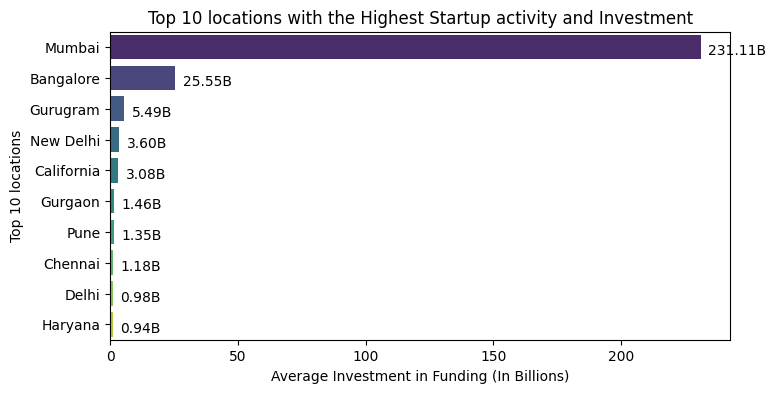

In [76]:
# Grouping the dataset based on the headquarters
startups_by_location = final_dataset.groupby('headquarter')['amount($)'].sum()

#Reset index and get the top 10 locations
top_10_locations = startups_by_location.reset_index().sort_values(by ='amount($)', ascending = False).head(10)

# top_10_locations

# #Convert the 'growth' values to billions
top_10_locations['growth_billions'] = top_10_locations['amount($)'] / 1e9

# Plotting using seaborn with formatted data labels
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='growth_billions', y='headquarter', data=top_10_locations, palette="viridis")
# Add the formatted numbers near the bars
for i, v in enumerate(top_10_locations['growth_billions']):
    bar_plot.text(v + 3, i + .25, f'{v:.2f}B', color='black', fontweight='light')

plt.title('Top 10 locations with the Highest Startup activity and Investment')
plt.xlabel('Average Investment in Funding (In Billions)')
plt.ylabel('Top 10 locations')
plt.show()

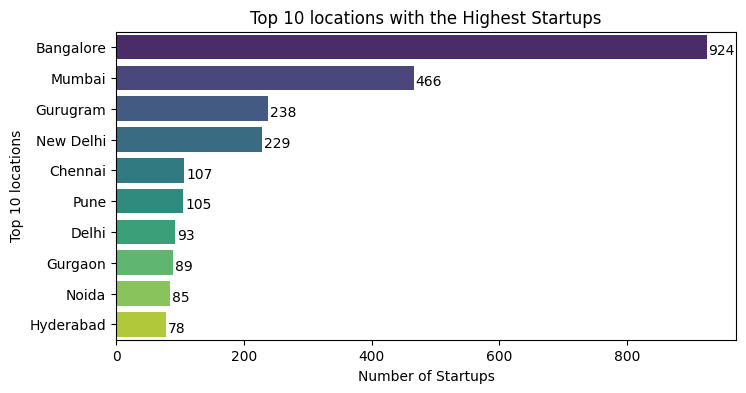

In [77]:
startups_by_location2 = final_dataset['headquarter'].value_counts()

# Reset index and get the top 10 locations
top_10_locations2 = startups_by_location2.head(10).sort_values(ascending=False).reset_index()
top_10_locations2.columns = ['headquarter', 'count']


# Plotting using seaborn
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='count', y='headquarter', data=top_10_locations2, palette="viridis")

# Add the numbers near the bars
for i, v in enumerate(top_10_locations2['count']):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='light')

plt.title('Top 10 locations with the Highest Startups')
plt.xlabel('Number of Startups')
plt.ylabel('Top 10 locations')
plt.show()


#### Observations
Mumbai emerges as the leader in investment volume, totaling an impressive 231 billion. On the other hand, Bangalore boasts the highest concentration of startups in India, numbering 924, with Mumbai following closely behind at 466. The substantial funding in Mumbai can be attributed to its dense population and robust economic activities, while Bangalore's status as India's equivalent of Silicon Valley fuels its vibrant ecosystem teeming with numerous tech startups.

#### 3. Are there any notable differences in funding patterns between early-stage startups and more established companies?

In [78]:
#Getting the median year for the founded coulmn
overall_median_per_year  # The overall median year is 2016

final_dataset['stage_of_startup'] = np.where(final_dataset['founded'] >= overall_median_per_year, 'Early Stage', 'Established')


In [79]:
# Display the count of each category in the 'stage' column
stage_distribution = final_dataset['stage_of_startup'].value_counts()

# Print or visualize the distribution
print(stage_distribution)


stage_of_startup
Early Stage    2074
Established     782
Name: count, dtype: int64


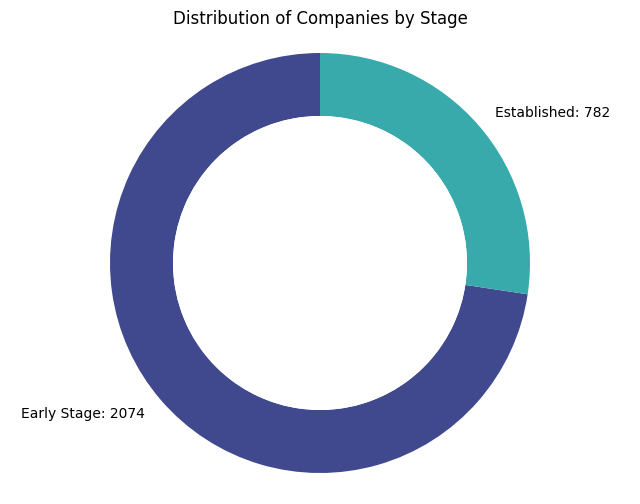

In [80]:
# Calculate the count of companies by stage
stage_counts = final_dataset['stage_of_startup'].value_counts()
# Set up the data for the donut chart
labels = stage_counts.index
sizes = stage_counts.values
# Set up colors
colors = sns.color_palette('mako', len(labels))
# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
# Draw a circle at the center of the donut to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
# Add count and percentage labels
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    text.set_text(f'{labels[i]}: {sizes[i]}')
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
# Add title
plt.title('Distribution of Companies by Stage')
# Show the plot
plt.show()




#### Descriptive

In [81]:
early_stage_stats = final_dataset[final_dataset['stage_of_startup'] == 'Early Stage']['amount($)'].describe()
established_stats = final_dataset[final_dataset['stage_of_startup'] == 'Established']['amount($)'].describe()

print("Early Stage Funding Statistics:")
print(early_stage_stats)

print("\nEstablished Funding Statistics:")
print(established_stats)


Early Stage Funding Statistics:
count    2.074000e+03
mean     8.398805e+07
std      3.293778e+09
min      8.789400e+02
25%      1.000000e+06
50%      3.000000e+06
75%      5.000000e+06
max      1.500000e+11
Name: amount($), dtype: float64

Established Funding Statistics:
count    7.820000e+02
mean     1.369671e+08
std      2.507085e+09
min      4.090000e+04
25%      3.000000e+06
50%      6.000000e+06
75%      3.000000e+07
max      7.000000e+10
Name: amount($), dtype: float64


####
**Mean Funding Amount:** Early-stage companies have a slightly lower mean funding amount ($83.88 million) compared to established companies ($136.97 million).

**Variability (Standard Deviation):** Both groups exhibit high variability in funding amounts, as indicated by the large standard deviations.

**Minimum and Maximum Funding:** Both groups have a wide range of funding amounts, with early-stage companies having a minimum of $720 and a maximum of $150 billion, while established companies range from $40,900 to $70 billion.

**Percentiles (Q1, Median, Q3):** Early-stage companies generally have lower funding amounts at each percentile compared to established companies.

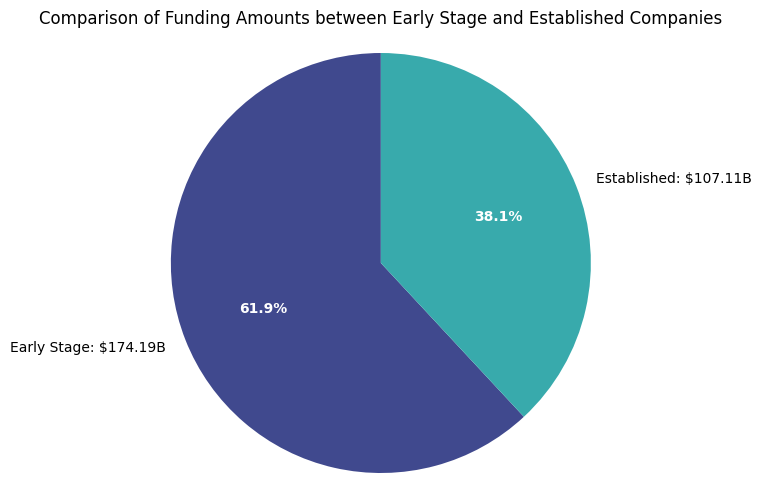

In [82]:
# Calculate the total funding amounts for each stage
stage_funding = final_dataset.groupby('stage_of_startup')['amount($)'].sum()
# Set up the data for the pie chart
labels = stage_funding.index
sizes = stage_funding.values
# Set up colors
colors = sns.color_palette('mako', len(labels))
# Create a pie chart
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Add funding amounts to labels
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    autotext.set_color('white')  # Change the color of the percentage text to white
    autotext.set_fontweight('bold')  # Make the percentage text bold
    text.set_text(f'{labels[i]}: ${sizes[i]/1e9:.2f}B')  # Set the label text to include both the label and its corresponding funding amount
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Add title
plt.title('Comparison of Funding Amounts between Early Stage and Established Companies')
# Show the plot
plt.show()

 

#### Observations
Early-stage startups have emerged as the frontrunners in funding between 2018 and 2021, securing a substantial sum of 174.19 billion. In contrast, established companies received a slightly lower amount of funding, totaling 107.11 billion during the same period. This trend underscores the growing investor confidence and support towards innovative and early-stage ventures, indicating a dynamic and thriving entrepreneurial landscape.

In [83]:
# Final merged dataset with cleaned column names and cleaned amount values
# final_dataset.to_csv('My data/final.csv')

#### Hypothesis Testing

#### 
Null Hypothesis(H0): There is no significant difference in the average funding amounts between early-stage startups and established companies.

Alternative Hypothesis(H1): There is a significant difference in the average funding amounts between early-stage startups and established companies.

In [84]:
early_stage_funding = final_dataset[final_dataset['stage_of_startup'] == 'Early Stage']
established_funding = final_dataset[final_dataset['stage_of_startup'] == 'Established']

#Perform Mann-Whitney U test
t, p = mannwhitneyu(early_stage_funding['amount($)'],established_funding['amount($)'], alternative='two-sided')

# Print the test statistic and p-value
print("Mann-Whitney U test statistic:", t)
print("P-value:", p)

# Set Significance level
alpha = 0.05
 
#Compare p-value to the significance level
if p < alpha:
    print('We reject the Null hypothesis which is there is no significant difference in the average funding amounts between early_stage startups and established companies')
else:
   print("We fail to reject the Null hypothesis")


Mann-Whitney U test statistic: 509878.5
P-value: 1.4395926385758316e-53
We reject the Null hypothesis which is there is no significant difference in the average funding amounts between early_stage startups and established companies


#### 4. Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India

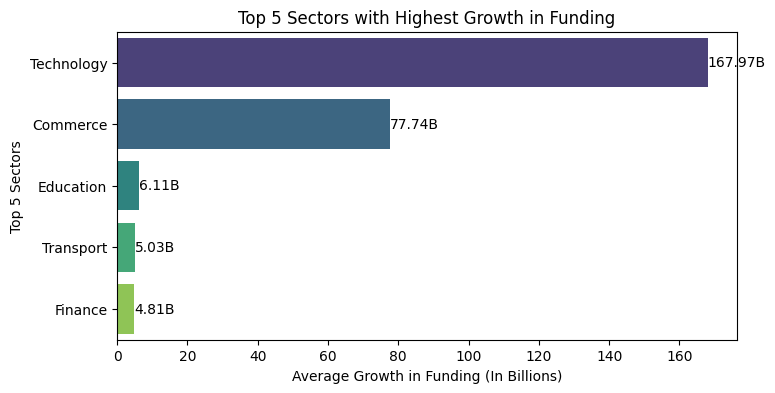

In [85]:
# Group data by sector and get the sum of the amount
sector_year_funding = final_dataset.groupby('sector')['amount($)'].sum()
sector_year_funding_reset = sector_year_funding.reset_index().sort_values(by='amount($)', ascending=False).head(5)

# Convert the 'growth' values to billions
sector_year_funding_reset['growth_billions'] = sector_year_funding_reset['amount($)'] / 1e9

def annotate_bars(data, ax):
    for index, value in enumerate(data['growth_billions']):
        ax.text(value, index, f'{value:.2f}B', ha='left', va='center', fontsize=10)

# Plotting using seaborn
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='growth_billions', y='sector', data=sector_year_funding_reset, palette="viridis")

plt.title('Top 5 Sectors with Highest Growth in Funding')
plt.xlabel('Average Growth in Funding (In Billions)')
plt.ylabel('Top 5 Sectors')

# Annotate the bars with values
annotate_bars(sector_year_funding_reset, ax)
plt.show()


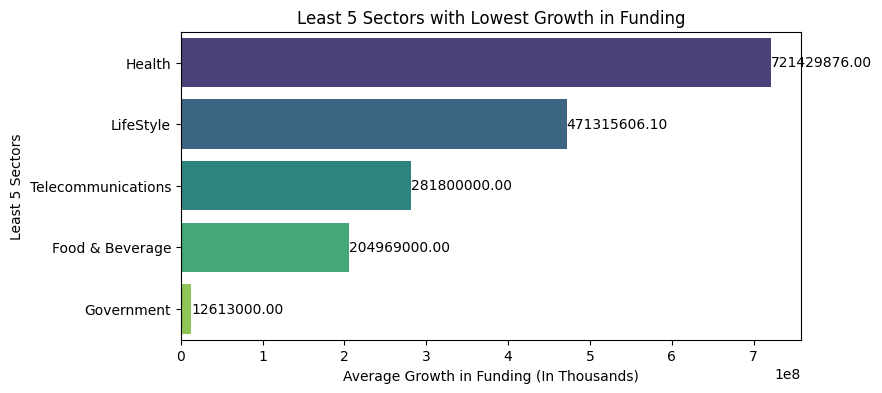

In [86]:
#Group data by sector and get the sum of the amount
sector_year_funding = final_dataset.groupby('sector')['amount($)'].sum()
sector_year_funding_reset = sector_year_funding.reset_index().sort_values(by='amount($)', ascending=False).tail(5)

#Convert the 'growth' values to billions
# sector_year_funding_reset['growth_billions'] = sector_year_funding_reset['amount($)'] / 1e9

def annotate_bars(data, ax):
    for index, value in enumerate(data['amount($)']):
        ax.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10)

# Plotting using seaborn
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='amount($)', y='sector', data=sector_year_funding_reset, palette="viridis")

annotate_bars(sector_year_funding_reset,ax)
plt.title('Least 5 Sectors with Lowest Growth in Funding')
plt.xlabel('Average Growth in Funding (In Thousands)')
plt.ylabel('Least 5 Sectors')
plt.show()


#### Obsevartions
In terms of funding distribution, the technology sector leads the way with the highest investment, closely followed by commerce. Conversely, the government sector experiences the lowest funding, with the food and beverage sector also receiving comparatively lower investment. This trend highlights the prioritization of technological innovation and commercial ventures in funding allocation, while sectors like government and food and beverage face relatively limited investment opportunities during the specified period.

#### 5. Which investors have more impact on startups over the years?

In [87]:
# Group by investor and sum the investment amounts
investor_impact = final_dataset.groupby('investor')['amount($)'].sum()

# Get the top 10 investors with the highest total investment amounts
top_10_investors = investor_impact.nlargest(10)

#Return top 10 investors
top_10_investors

# Reset index and rename the columns
top_10_investors_reset = top_10_investors.reset_index()
top_10_investors_reset.columns = ['Investor', 'amount']
top_10_investors_reset

,Investor,amount
0,Venture Catalysts,1.543241e+11
1,Mubadala Investment Company,7.000000e+10
2,Dragoneer Investment Group,3.000000e+09
3,Tiger Global,2.505000e+09
4,Silver Lake,2.200000e+09
5,Tiger Global Management,1.656000e+09
6,Softbank,1.368000e+09
7,Sequoia Capital India,1.132833e+09
8,Hindustan Media Venture,1.023292e+09
9,Glade Brook Capital Partners,1.000000e+09


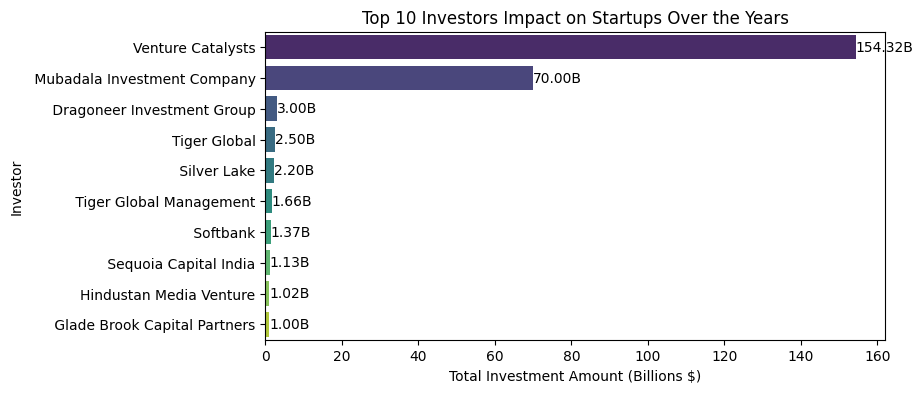

In [88]:
# Convert the 'amount' values to billions
top_10_investors_reset['amount_billions'] = top_10_investors_reset['amount'] / 1e9

# Sort the DataFrame by 'amount_billions' column in descending order
top_10_investors_reset = top_10_investors_reset.sort_values(by='amount_billions', ascending=False)

# Plotting using seaborn
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='amount_billions', y='Investor', data=top_10_investors_reset, palette="viridis")

# Add data labels
for index, row in top_10_investors_reset.iterrows():
    bar_plot.text(row['amount_billions'], index, f'{row["amount_billions"]:.2f}B', va='center')

plt.title('Top 10 Investors Impact on Startups Over the Years')
plt.xlabel('Total Investment Amount (Billions $)')
plt.ylabel('Investor')
plt.show()



#### Observations
In the Indian ecosystem, Venture Catalysts emerges as the top investor with the highest amount of investments, closely followed by Mubadala Investment Company. This reflects the diverse and dynamic investment landscape in India, showcasing both local players like Venture Catalysts and global investors like Mubadala Investment Company actively participating and contributing to the growth of startups and businesses in the country.

#### 6. What are the key characteristics of startups that successfully secure funding, and how do they differ from those that struggle to attract investment?

- Stage: Early-stage startups have a higher likelihood of securing funding compared to established companies. Investors are often attracted to new, innovative ventures with high growth potential. This trend is evident in the funding distribution, where early-stage startups receive more investment compared to their established counterparts.
- Location: The location of a startup plays a crucial role in its ability to attract investment. Thriving startup ecosystems, such as those in Mumbai and Bangalore, offer access to a supportive network of investors, talent, and resources. Startups located in these hubs have a competitive advantage in securing funding compared to those in regions with less-developed startup ecosystems.

### Recommendations
Based on the analysis of funding trends from 2018 to 2021, the Technology sector emerges as a top performer, attracting significant investments and showcasing remarkable growth. This sector presents lucrative opportunities for investors and entrepreneurs alike, particularly in areas such as software development, artificial intelligence, e-commerce, and digital services. Therefore, it is highly recommended to explore investment avenues within the Technology sector due to its potential for favorable returns and innovation-driven growth.

Additionally, diversifying investment portfolios to include sectors that integrate technology, such as retail and healthcare, can further enhance investment prospects. Tech-enabled solutions in these sectors have demonstrated promising potential and are likely to attract increased funding.

Furthermore, considering the strong correlation between amount of funding and location, setting up startups in technology-focused hubs like Bangalore can expedite access to finance and support ecosystem collaborations. Mumbai, with its thriving startup ecosystem and substantial funding activity, also presents compelling opportunities for networking and investment exploration.


### Conclusions
Based on the analysis of funding trends from 2018 to 2021, it's evident that the Technology sector has been a standout performer, attracting significant investments. This sector, along with related tech-incorporated sectors like retail and health, presents promising opportunities for investors and entrepreneurs. Bangalore and Mumbai, being a prominent hub for startups and investments, offers valuable networking prospects. Therefore, exploring opportunities in tech-driven sectors and engaging with Mumbai's startup ecosystem could lead to favorable outcomes in terms of growth and innovation.


Made with 💖 [Adiru Valiant Ezabuku](https://github.com/valiantezabuku/A-Data-Analysis-Project)
<span style="color: #aaaaaa;">2024</span>